# DATA MINING

Data mining merupakan proses pengumpulan dan pengolahan data yang bertujuan untuk mengekstrak informasi penting pada data. Proses pengumpulan dan ekstraksi informasi tersebut dapat dilakukan menggunakan software dengan bantuan perhitungan statistika, matematika, ataupun teknologi Artificial Intelligence (AI). Data mining sering disebut juga Knowledge Discovery in Database (KDD). Data mining memiliki tiga tujuan secara umum yaitu sebagai sarana untuk menjelaskan atau explanatory, untuk konfirmasi atau confirmatory, dan untuk eksplorasi atau exploratory. Selain itu juga memiliki beberapa metode seperti Association, Classification, Regression, dan Clustering.

Pada data mining, terdapat istilah dataset. Dataset merupakan istilah informal yang mengacu pada kumpulan data. Secara umum, dataset berisi lebih dari satu variabel dan menyangkut suatu topik tertentu. Dataset juga dikatakan sebuah kumpulan data yang berasal dari informasi-informasi pada masa lalu dan siap untuk dikelola menjadi sebuah informasi baru. Pada pembahasan kali ini, Dataset yang digunakan adalah dataset bunga Iris yang diperoleh dari Kaggle. Dalam proyek ini akan mengeksplorasi dan mengklasifikasikan spesies bunga Iris berdasarkan panjang sepal, lebar sepal, panjang kelopak, dan lebar kelopak.

<img src="CRISP-DM.jpg" width="75%" align="center" />

CRISP-DM
Cross-Industry Standard Process for Data Mining (CRISP-DM) adalah model proses yang menggambarkan siklus hidup ilmu data. Singkatnya, ini mengarahkan untuk melalui seluruh fase mulai dari perencanaan, pengorganisasian, dan implementasi proyek data mining. Model proses untuk data mining ini memberikan gambaran umum siklus hidup proyek data mining. Ini berisi fase proyek, tugas masing-masing dan hubungan antara aktifitas aktifitas yang dilakukan setiap tahapan seperti gambar disamping.

Berikut ini akan membahas mengenai step-by-step dalam Proses data mining adalah sebagai berikut.

<hr>

## Mengumpulkan Data

Pada pekerjaan ini, kita akan melakukan analisis klasifikasi bunga. Oleh karena itu, tugas pertama adalah mengumpulkan data iris flower.
Sedangkan, data berada di aiven.io. Maka dari itu, diperlukan adanya penarikan data tersebut.

In [1]:
df_1 = _deepnote_execute_sql('SELECT * FROM `irismysql`.`irisfull` LIMIT 150', 'SQL_69180BE6_4514_45E9_A13B_52B1406EF574', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_1

NameError: name '_deepnote_execute_sql' is not defined

- Study Case #1 - 29 Februari 2024

Membuat tabel pada cloud & postgreSql dengan isian, di antaranya:
id, sepal.length, sepal.width, class (cloud)
id, petal.length, petal.width, class (postgreSql)

Penyelesaian:

### Menarik Data dari MySql

In [2]:
df_2 = _deepnote_execute_sql('SELECT * FROM `irismysql`.`iriscloud` LIMIT 100', 'SQL_69180BE6_4514_45E9_A13B_52B1406EF574', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_2

,id,sepal.length,sepal.width,variety
0,1,5.1,3.5,Setosa
1,2,4.9,3.0,Setosa
2,3,4.7,3.2,Setosa
3,4,4.6,3.1,Setosa
4,5,5.0,3.6,Setosa
...,...,...,...,...
95,96,5.7,3.0,Versicolor
96,97,5.7,2.9,Versicolor
97,98,6.2,2.9,Versicolor
98,99,5.1,2.5,Versicolor


Dapat diperhatikan tabel di atas, bahwa yang muncul pada tabel hanya sebatas id, sepal.length, sepal.width, dan variety (class).

id -> untuk penomoran data (identitas tiap barisnya)
sepal.length -> untuk pengukuran panjang sepal bunga iris
sepal.width -> untuk pengukuran lebar sepal bunga iris
variety -> untuk pengelompokkan jenis bunga iris (setosa/versicolor/virginica)

### Menarik Data dari Postgre

In [3]:
df_3 = _deepnote_execute_sql('SELECT * FROM irispostgre', 'SQL_ED09B93E_4FB0_4700_A502_93A277042FCF', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_3

,id,petal.length,petal.width,variety
0,1,1.4,0.2,Setosa
1,2,1.4,0.2,Setosa
2,3,1.3,0.2,Setosa
3,4,1.5,0.2,Setosa
4,5,1.4,0.2,Setosa
...,...,...,...,...
145,146,5.2,2.3,Virginica
146,147,5.0,1.9,Virginica
147,148,5.2,2.0,Virginica
148,149,5.4,2.3,Virginica


Selanjutnya, pada data yang berbeda (PostgreSql) terdapat juga data bunga iris dengan isian, di antaranya: id, petal.length, petal.width, dan variety (class).

id -> untuk penomoran data (identitas tiap barisnya)
petal.length -> untuk pengukuran panjang petal bunga iris
petal.width -> untuk pengukuran lebar petal bunga iris
variety -> untuk pengelompokkan jenis bunga iris (setosa/versicolor/virginica)

<img src="iris_flower.webp" width="" align="" />

                                                                                                *keterangan foto bunga iris

<hr>

## Memahami Data

Pada pekerjaan ini, kita akan mendeskripsikan data iris. Urutan dari hal ini, di antaranya:
1. Menentukan jumlah data perkelas (data klasifikasi / ada labelnya)
   -> Jumlah class Setosa sebanyak ....
2. Identifikasi missing values
   -> Menentukan jumlah baris pada kolom-kolom yang kosong
3. Mendeskripsikan tipe-tipe data setiap kolom/fitur/variabel
   -> fitur sepal length: tipe numerik (hasil pengukuran dari sepal length bunga iris)
   -> fitur sepal width: tipe numerik (hasil pengukuran dari sepal width bunga iris)

### Menentukan Jumlah Data Perkelas

Pada setiap kolom pada data iris, terdapat 150 jumlah data. Sedangkan, untuk class nya sendiri, terdapat 3 jenis iris (Setosa, Versicolor, Virginica)

### Mengidentifikasi Missing Values

In [4]:
df_4 = _deepnote_execute_sql('SELECT * FROM `irismysql`.`irisfull` WHERE `sepal.length` IS NULL', 'SQL_69180BE6_4514_45E9_A13B_52B1406EF574', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_4

,id,sepal.length,sepal.width,petal.length,petal.width,variety


terdapat ada 5 baris yang hilang pada kolom 'sepal.length' pada class (variety) 'Setosa' di antara kolom-kolom lainnya pada data iris

In [5]:
df_5 = _deepnote_execute_sql('SELECT * FROM `irismysql`.`irisfull` WHERE `sepal.length` IS NOT NULL AND `variety` = \'Setosa\'', 'SQL_69180BE6_4514_45E9_A13B_52B1406EF574', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_5

,id,sepal.length,sepal.width,petal.length,petal.width,variety
0,1,5.1,3.5,1.4,0.2,Setosa
1,2,4.9,3.0,1.4,0.2,Setosa
2,3,4.7,3.2,1.3,0.2,Setosa
3,4,4.6,3.1,1.5,0.2,Setosa
4,5,5.0,3.6,1.4,0.2,Setosa
5,6,5.4,3.9,1.7,0.4,Setosa
6,7,4.6,3.4,1.4,0.3,Setosa
7,8,5.0,3.4,1.5,0.2,Setosa
8,9,4.4,2.9,1.4,0.2,Setosa
9,10,5.0,3.1,1.5,0.1,Setosa


-> Mengisi dengan mencari rata-rata dengan memerhatikan classnya (jika class pada data NULL itu berbeda).

In [6]:
average = df_5['sepal.length'].mean()
print(average)

4.994


-> Mendapatkan hasil bahwa, rata-rata nilai dari kolom 'sepal.length' yang tidak kosong (IS NOT NULL) pada class 'Setosa' adalah 4.99.

In [7]:
df_6 = _deepnote_execute_sql('UPDATE `irismysql`.`irisfull` SET `sepal.length` = \'4.99\' WHERE `variety` = \'Setosa\' AND `sepal.length` IS NULL', 'SQL_69180BE6_4514_45E9_A13B_52B1406EF574', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_6

-> Melakukan update data secara Query dengan memasukkan nilai rata-rata yang telah dicari pada kolom 'sepal.length' IS NULL / Kosong

In [8]:
df_7 = _deepnote_execute_sql('SELECT * FROM `irismysql`.`irisfull` WHERE `sepal.length` IS NOT NULL AND `variety` = \'Setosa\'', 'SQL_69180BE6_4514_45E9_A13B_52B1406EF574', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_7

,id,sepal.length,sepal.width,petal.length,petal.width,variety
0,1,5.1,3.5,1.4,0.2,Setosa
1,2,4.9,3.0,1.4,0.2,Setosa
2,3,4.7,3.2,1.3,0.2,Setosa
3,4,4.6,3.1,1.5,0.2,Setosa
4,5,5.0,3.6,1.4,0.2,Setosa
5,6,5.4,3.9,1.7,0.4,Setosa
6,7,4.6,3.4,1.4,0.3,Setosa
7,8,5.0,3.4,1.5,0.2,Setosa
8,9,4.4,2.9,1.4,0.2,Setosa
9,10,5.0,3.1,1.5,0.1,Setosa


-> Setelah di UPDATE, akan menghasilkan data yang NULL tadi dengan nilai 4.99 (Bernilai 5 jika dibulatkan)

Catatan: Jika suatu data tidak ada class (Label), maka jika mencari rata-rata data yang ada Missing Values, tinggal rata-rata keseluruhan data yang tidak kosong tanpa memikirkan setiap classnya. Dikarenakan data tidak mempunyai class / Label.

### Perbedaan Jenis Kategori atau Nilai

- Jika mencari data yang MISSING VALUES dengan datanya kategori -> mencari dengan banyaknya data yang sering muncul (MODUS)

- Sedangkan, mencari data MISSING VALUES dengandatanya bernilai -> mencari dengan cara meghitung rata-rata nya 

### Metode K-NN

K-Nearest Neighbors (K-NN) adalah salah satu metode dalam supervised learning pada Machine Learning yang dapat digunakan untuk klasifikasi dan regresi. K-NN bekerja dengan mencari jarak antara titik baru dan semua titik dalam dataset pelatihan. Jarak-jarak tersebut diurutkan dan K titik dalam dataset pelatihan terdekat terpilih sebagai tetangga terdekat. 

Untuk masalah klasifikasi, label kelas dari titik baru adalah label yang paling sering dari K tetangga terdekat. Sedangkan untuk masalah regresi, label atau output adalah rata-rata atau median dari K tetangga terdekat. 

Nilai K dalam K-NN adalah hiperparameter yang harus dipilih oleh pengguna. Nilai K yang berbeda-beda dapat menghasilkan model yang berbeda-beda dan memiliki performa yang berbeda-beda pada dataset yang sama. 

- Study Case #2 - 07 Maret 2024

Menjelaskan algoritma KNN beserta contoh cara menghitung manual (Excel Version)
Implementasikan pada missing values data anda (Missing values = 5)
menggunakan library scikit learn -> sklearn.impute.KNNImputer

Penyelesaian:

### Algoritma K-Nearest Neighbor

1. Menentukan nilai K (tetangga terdekat itu siapa -> jika awal = 2, maka akhiran nanti juga = 2)
2. Menghitung jarak antara data uji dengan data latih
3. Mengurutkan jarak dari yang terkecil hingga terbesar
4. Mengambil data sebanyak K terdekat
5. Memilih kelas mayor (menghitung rata-rata -> karena datanya numerik)

Untuk mencari dekat atau jauhnya jarak antar titik pada class K biasanya dihitung menggunakan jarak Euclidean. Jarak Euclidean adalah formula untuk mencari jarak antara 2 titik dalam ruang dua dimensi. Berikut rumus untuk menghitung jarak Euclidean:

### Rumus Euclidean Distance

$$ d(x,y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2} $$

### Implementasi Algoritma KNN Manual

<img src="KNN Manual/data mentah.jpg" width="75%" align="center" />

<img src="KNN Manual/data mentah (2).jpg" width="75%" align="left" />

Dapat diketahui bahwa terdapat 5 kolom yang missing values yakni pada kolom 'sepal.length' di id 5, 10, 15, 20, dan 25. Untuk memudahkan proses penghitungan, 5 kolom tersebut diletakkan pada baris paling bawah (sebelumnya berurutan).

<img src="KNN Manual/Jarak Euclidean.jpg" width="75%" align="" />

<img src="KNN Manual/Jarak Euclidean (2).jpg" width="75%" align="left" />

Selanjutnya, dihitung jarak Euclidean nya dengan rumus yang tertera di atas (acuan pengurangan ke kolom kosong/NULL, yaitu id 5, 10, 15, 20, 25). Setelah dihitung tersebut, dilanjutkan menghitung rata-rata dari tiap hasil jarak Euclidean pada masing-masing kolom (sepal.width, petal.length, petal.width). Lalu, diberikan label / penanda dengan kolom 'Urutan' untuk mempermudah step selanjutnya.

<img src="KNN Manual/Hasil Sorting.png" width="50%" align="" />

<img src="KNN Manual/Hasil Sorting (2).png" width="50%" align="left" />

Kemudian, dilakukan Sorting atau diurutkan dari nilai terkecil hingga terbesar dengan penanda yang telah ditulis step sebelumnya. Dapat dilihat gambar diatas, dimulai nilai terkecil 0.457478 hingga terbesar yaitu 1.296331.

<img src="KNN Manual/Ambil K Terdekat.png" width="75%" align="" />

<img src="KNN Manual/Ambil K Terdekat (2).png" width="100%" align="left" />

Setelah itu, mengambil data sebanyak K terdekat. Dapat diketahui, K yang ditentukan pada awal yaitu 5. Oleh karena itu, pada step ini juga mengambil data sebanyak 5. Dengan kata lain, awal dan akhiran harus sama untuk menentukan banyaknya K. Dapat dilihat pada gambar diatas, data yang telah diurutkan sekaligus diambil 5 data terdekat, di antaranya id 4, 38, 28, 30, dan 36.

<img src="KNN Manual/Hasil Akhir KNN Manual.png" width="actual" align="left" />

$$
\overline{S} = \frac{\sum_{i=4}^{8} S_i}{5}
$$

Pada akhirnya, tinggal menghitung rata-rata dari kelima data yang terdekat itu. Rata-rata yang digunakan adalah kolom 'sepal.length'. Dapat dilihat rumus dan gambar diatas, penjumlahan dari kolom 'sepal.length' di id 4, 38, 28, 30, 36 dibagi dengan 5 dengan menghasilkan nilai akhirnya adalah 4.88.

Dengan demikian, cara menghitung K-Nearest Neighbor secara manual telah dilakukan. Diharapkan dengan menggunakan cara manual ini, dapat memahami lebih dalam mengenai K-Nearest Neighbor itu. Dimana, hal ini merupakan pondasi untuk melakukan penghitungan K-Nearest Neighbor secara otomatisasi / coding menggunakan library scikit learn -> sklearn.impute.KNNImputer.

### Implementasi KNN Library Scikit Learn

In [9]:
df_8 = _deepnote_execute_sql('SELECT * FROM irisfull', 'SQL_ED09B93E_4FB0_4700_A502_93A277042FCF', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_8

,id,sepal.length,sepal.width,petal.length,petal.width,variety
0,1,5.1,3.5,1.4,0.2,Setosa
1,2,4.9,3.0,1.4,0.2,Setosa
2,3,4.7,3.2,1.3,0.2,Setosa
3,4,4.6,3.1,1.5,0.2,Setosa
4,6,5.4,3.9,1.7,0.4,Setosa
...,...,...,...,...,...,...
145,147,6.3,2.5,5.0,1.9,Virginica
146,148,6.5,3.0,5.2,2.0,Virginica
147,149,6.2,3.4,5.4,2.3,Virginica
148,150,5.9,3.0,5.1,1.8,Virginica


Dalam case ini, terdapat 5 kolom yang missing values, tepatnya pada kolom 'sepal.length' lebih tepatnya di id 5, 10, 15, 20, dan 25 (selengkapnya cek data di atas), sama halnya pada Implementasi Algoritma KNN Manual. Akan tetapi, yang membedakan pada kali ini, database yang digunakan adalah PostgreSql. Dimana sebelumnya sudah menggunakan data dari database MySql.

In [10]:
df_8.isnull().sum()

id              0
sepal.length    5
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

Dapat diketahui, pada data di atas terdapat data yang missing values (IS NULL) di kolom 'sepal.length' sebanyak 5.

In [11]:
df_8.loc[df_8["sepal.length"].isnull()]

,id,sepal.length,sepal.width,petal.length,petal.width,variety
97,10,NaN,3.1,1.5,0.1,Setosa
98,15,NaN,4.0,1.2,0.2,Setosa
99,20,NaN,3.8,1.5,0.3,Setosa
100,25,NaN,3.4,1.9,0.2,Setosa
149,5,NaN,3.6,1.4,0.2,Setosa


Selanjutnya, mengecek dari kelima data tersebut, terdapat uraian berupa data di atas dengan id 5, 10, 15, 20, dan 25 pada kolom 'sepal.length'. Dapat dilihat data di atas, kelima data itu yang mewakili bahwa data tersebut kosong adalah 'nan'.

In [12]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

dict = df_8  # Asumsi df_8 data yang digunakan

Before_imputation = pd.DataFrame(dict)
print("Data Sebelum melakukan imputasi\n", Before_imputation)

imputer = KNNImputer(n_neighbors=2)
After_imputation = imputer.fit_transform(Before_imputation.drop(["variety"], axis=1))

# Konversi Output ke DataFrame dengan 2 angka dibelakang koma 
After_imputation_df = pd.DataFrame(After_imputation, columns=Before_imputation.drop(["variety"], axis=1).columns)
After_imputation_df = After_imputation_df.round(2)  # menggunakan fungsi round()

# Konversi kolom 'id' ke integer
After_imputation_df['id'] = After_imputation_df['id'].astype(int)

# Mencari indeks ke-berapa saja yang kosong pada kolom 'sepal.length'
imputed_indices = np.where(np.isnan(Before_imputation['sepal.length']))[0]

# Print Baris sebelum dan sesudah imputasi untuk terutama indeks yang kosong/nan
print("\n\nData Sebelum imputasi untuk baris yang kosong:\n", Before_imputation.iloc[imputed_indices])
print("\n\nData Setelah imputasi untuk baris yang kosong:\n", After_imputation_df.iloc[imputed_indices])

Data Sebelum melakukan imputasi
       id  sepal.length  sepal.width  petal.length  petal.width    variety
0      1           5.1          3.5           1.4          0.2     Setosa
1      2           4.9          3.0           1.4          0.2     Setosa
2      3           4.7          3.2           1.3          0.2     Setosa
3      4           4.6          3.1           1.5          0.2     Setosa
4      6           5.4          3.9           1.7          0.4     Setosa
..   ...           ...          ...           ...          ...        ...
145  147           6.3          2.5           5.0          1.9  Virginica
146  148           6.5          3.0           5.2          2.0  Virginica
147  149           6.2          3.4           5.4          2.3  Virginica
148  150           5.9          3.0           5.1          1.8  Virginica
149    5           NaN          3.6           1.4          0.2     Setosa

[150 rows x 6 columns]


Data Sebelum imputasi untuk baris yang kosong:
      

Kemudian, memberikan sedikit tambahan code yang sesuai pada dokumentasi library  scikit-learn KNNImputer. Mulai dari inisialisasi library, data yang digunakan (df_8) sampai menghasilkan keluaran / output Data sebelum imputasi serta Data sebelum dan sesudah imputasi untuk baris yang kosong / nan. Selengkapnya dapat melihat hasil pada code di atas.

Demikian untuk Implementasi dalam Algoritma KNN baik itu secara manual bahkan menggunakan Library Scikit Learn. Hasil akhir dari keduanya hampir mirip atau tidak berbeda jauh. Dengan kata lain, sudah melakukan proses dari awal sampai akhir sudah baik walaupun tidak menutup kemungkinan masih ada beberapa kekeliruan yang disengaja ataupun tidak. Semoga dapat memberikan gambaran bahwa adanya algoritma KNN ini digunakan.

<hr>

## Deteksi LOF (Local Outlier Factor)

### Teori LOF

Algoritma Local Outlier Factor (LOF) adalah metode pendeteksian anomali tanpa pengawasan yang menghitung variasi kepadatan lokal dari suatu titik data sehubungan dengan tetangganya. Algoritma ini menganggap sampel yang memiliki bobot yang jauh lebih rendah daripada tetangganya sebagai outlier. Outlier dalam ilmu statistik adalah titik data yang nilainya jatuh jauh dari titik data lainnya. Outlier bisa muncul sebagai pengecualian dalam pola data yang ada. Nilainya bisa jauh lebih tinggi atau jauh lebih rendah dibanding nilai-nilai lain dalam kumpulan data (dataset).

LOF adalah teknik berbasis densitas yang menggunakan pencarian tetangga terdekat untuk mengidentifikasi titik-titik anomali. Pada dasarnya LOF, suatu titik didasarkan pada rasio kepadatan lokal area di sekitar titik tersebut dan kepadatan lokal tetangganya. LOF mempertimbangkan kepadatan relatif dari titik-titik data. Dengan kata sederhana, LOF membandingkan kepadatan lokal suatu titik dengan kepadatan lokal dari k tetangga terdekatnya dan memberikan hasil akhir berupa peringkat.

Keuntungan menggunakan LOF adalah membantu mengidentifikasi titik-titik yang merupakan pencilan relatif terhadap sekelompok titik lokal. Sebagai contoh, ketika menggunakan teknik local outlier factor, tetangga dari titik-titik tertentu diidentifikasi dan dibandingkan dengan densitas dari titik-titik tetangga.

Langkah-langkah berikut ini dapat diterapkan ketika menggunakan model LOF:
1) Hitung jarak antara P dan semua titik yang diberikan dengan menggunakan fungsi jarak seperti euclidean atau Manhattan.
2) Temukan titik terdekat ke-k (k-tetangga terdekat). Sebagai contoh, jika K = 3, cari jarak tetangga terdekat ketiga.
3) Temukan k titik terdekat.
4) Temukan kepadatan jangkauan lokal menggunakan persamaan berikut:

$$
\text{lrd}{_k}(o) = \frac{||N_k(o)||}{\sum_{o' \in N_k(o)} \text{reachdist}{_k}(o' \leftarrow o)}
$$

di mana jarak yang dapat dijangkau dapat dihitung sebagai berikut:

$$ \text{reachdist}{_k}(o' \leftarrow o) = \max\left\{ \text{dist}{_k}(o), \text{dist}(o, o') \right\} $$

Harap diperhatikan bahwa Nk(O) mengacu pada jumlah tetangga.
5) Langkah terakhir adalah menghitung faktor pencilan lokal sebagai berikut:

$$
\text{LOF}_k(o) = \frac{\sum_{o' \in N_k(o)} \frac{lrd_k(o')}{lrd_k(o)}}{||N_k(o)||}
$$

### Contoh Proses LOF Manual (5 Data & 3 Fitur)

Pada kali ini, akan terdapat contoh sekaligus penjelasan singkat terkait langkah-langkah implementasi algoritma Local Outlier Factor (LOF) secara manual pada Microsoft Excel untuk mendeteksi outlier dalam dataset. Implementasi ini menggunakan rumus dan fungsi Excel untuk menghitung LOF dan mengidentifikasi data yang nilainya jauh dari tetangganya (outlier).

- Menentukan Dataset (Data Awal) yang Digunakan

<img src="LOF Manual/Dataset.png" width="50%" align="left" />

Pada tahap awal, diketahui ada 5 data yang tersedia, yaitu a, b, c, d, e. Sedangkan, adapula fitur yang tertera, yakni x, y, z. Pada masing-masing kolom berisikan data / angka yang berbeda-beda. Nantinya kita akan mencari outlier dari data yang tersedia di atas.

- Menghitung semua jarak antara setiap n titik data

<img src="LOF Manual/Step 1.png" width="50%" align="left" />

Pada langkah pertama, menghitung seluruh jarak antara tiap-tiap titik data. Pada contoh di atas, menggunakan tiap 3 titik data. Pada kolom proses dilakukan pengurangan antar titik yang dicari. Pastikan menggunakan rumus ABS() atau Absolute agar menghindari hasil yang negatif. Hal ini dikarenakan mencari hasil yang keseluruhan positif agar mempermudahkan proses LOF selanjutnya. Setelah itu, akan menghasilkan kolom 'Hasil' yang menampung dari penjumlahan tiap-tiap proses penghitungan jarak sebelumnya.

- Menghitung semua dist₃(o)

<img src="LOF Manual/Step 2.png" width="50%" align="left" />

Selanjutnya, menghitung seluruh dist₃(o). distₖ(o) merupakan jarak antara o (object) dan NN ke-k (tetangga terdekat ke-k). Diketahui pada gambar di atas, bahwa dipisahkan tiap-tiap jarak (distance) mulai dari a, b, sampai e. Lalu, diurut masing-masing jarak tersebut mulai dari yang terkecil hingga terbesar. Kemudian, ditarik hasil dalam dist₃(o) -> o = a, b, c, d, e dari k = 3, di antaranya 9, 9, 14, 16, dan 8. Angka-angka itu didapatkan dari urutan ketiga angka setelah diurutkan (kolom Setelah Diurutkan).

- Menghitung semua Nₖ(o)

                                        lingkungan jarak-k dari o               ->

$$ \text{N}{_k}(o) = \left\{ \text{o' | o' in D}, \text{dist}(o, o') \leq \text{dist}{_k} (o) \right\} $$

<img src="LOF Manual/Step 3.png" width="" align="left" />

Setelah itu, menghitung seluruh lingkungan jarak-k dari o / object. Dapat dilihat pada gambar di atas, misalnya hasil dari N₃(a) diperoleh b, c, d, dan e. Hal ini dapat terjadi karena keempat titik tersebut hasil manhattan (Step 1) itu termasuk kurang dari sama dengan (≤) dari object a. Berlaku juga untuk N₃(b) - N₃(e) karena rumusnya sama (rumus Latex di atas).

- Menghitung semua lrdₖ(o)

lrdₖ(o) -> Local Reachability Density of o (Kepadatan Keterjangkauan Lokal dari o / object)

$$
\text{lrd}{_k}(o) = \frac{||N_k(o)||}{\sum_{o' \in N_k(o)} \text{reachdist}{_k}(o' \leftarrow o)}
$$

|| Nₖ(o) || berarti jumlah objek dalam Nₖ(o)

$$ \text{reachdist}{_k}(o' \leftarrow o) = \max\left\{ \text{dist}{_k}(o), \text{dist}(o, o') \right\} $$

<img src="LOF Manual/Step 4.png" width="" align="left" />

Selanjutnya, menghitung semua kepadatan keterjangkauan lokal lrdₖ(o). Dilihat gambar serta rumus di atas, misalnya pada lrd₃(a) menghasilkan nilai sebesar 0.266667. Hal ini terjadi karena rumus lrdₖ(o) di atas, bahwa 4 (jumlah kepadatan keterjangkauan lokal) dibagi dengan penjumlahan 1, 5, 9 (Step 2 -> kolom Setelah Diurutkan). Dimana 1, 5, 9 diperoleh dari reachdist (jangkauan jarak) k = 3 dari selain object a (b, c, d, e). Demikian pula, untuk cara mencari lrd₃(b) - lrd₃(e) yang mana akan menghasilkan nilai akhir sesuai tabel di atas.

- Menghitung semua LOFₖ(o)

$$
\text{LOF}_k(o) = \frac{\sum_{o' \in N_k(o)} \frac{lrd_k(o')}{lrd_k(o)}}{||N_k(o)||} = {\sum_{o' \in N_k(o)}}{lrd_k(o')} . {\sum_{o' \in N_k(o)}} \text{reachdist}{_k}(o' \leftarrow o)
$$

<img src="LOF Manual/Step 5.png" width="" align="left" />

Kemudian, pada tahap selanjutnya menghitung semua  Local Outlier Factor-k (LOFₖ) pada tiap object. Pada gambar di atas, misalnya diketahui LOF₃(a) -> sesuai rumus di atas. Hal itu akan menghasilkan nilai sebesar 10.57703. Dimana asalnya dari penjumlahan seluruh hasil kecuali lrd₃(a), yaitu lrd₃(b) - lrd₃(e) dikalikan dengan penjumlahan reachdist (jangkauan jarak) k = 3 dari selain object a (b, c, d, e). Demikian pula untuk mencari hasil LOF₃(b) - LOF₃(e) dengan acuan rumus di atas. Akhirnya, akan menghasilkan nilai-nilai yang tertera pada kolom 'Hasil'.

- Mengurutkan semua LOFₖ(o)

<img src="LOF Manual/Step 6.png" width="" align="left" />

Terakhir, mengurutkan hasil dari proses LOFₖ(o) sebelumnya (Step 5). Urutannya dimulai dari yang terbesar ke terkecil dan akan menghasilkan sesuai gambar di atas. Dapat disimpulkan, bahwa LOF₃(d) mendapatkan nilai yang tertinggi sebesar 39.73109 serta dapat dipastikan untuk LOF₃(d) merupakan outliner dari dataset yang diketahui di awal.

### Implementasi LOF Menggunakan Scikit Learn dari Data Manual

Selanjutnya, akan diberikan contoh untuk menunjukkan implementasi menggunakan library Scikit-Learn untuk mendeteksi outlier dalam dataset dengan algoritma Local Outlier Factor (LOF). LOF adalah metode yang efektif untuk mendeteksi outlier dalam data multidimensi. Dataset yang digunakan dalam contoh ini adalah dataset buatan yang terdiri dari 5 data point dengan 3 fitur. Berikut ini akan dijelaskan langkah-langkah dalam membangun code untuk mendeteksi outlier dalam dataset dengan algoritma LOF.

In [13]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
X = [[1,0,1], [2,2,1], [1,1,0], [10,2,0], [3,2,1]]
clf = LocalOutlierFactor(n_neighbors=3, p=1)
clf.fit_predict(X)

array([ 1,  1,  1, -1,  1])

Langkah-langkah:
1. Import library: Import library NumPy dan LocalOutlierFactor dari Scikit-Learn.
2. Membuat dataset: Mengisi dataset dengan NumPy.
3. Mendefinisikan model LOF: Membuat model LOF dengan menentukan nilai k untuk k-nearest neighbors (n_neighbors) => sebesar 3 dan metode untuk menghitung local density (p) => sebesar 1 (karena menggunakan Manhattan).
4. Melatih model LOF: Latih model LOF pada dataset.
5. Memprediksi outlier: Gunakan model LOF untuk memprediksi outlier dalam dataset. Angka yang menghasilkan -1 merupakan outlier. Sedangkan, angka 1 adalah data normal.

Output dari model LOF adalah array dengan nilai LOF untuk setiap data point. Data point dengan nilai LOF yang lebih tinggi dibandingkan data point lainnya adalah outlier. Dimana dapat disimpulkan bahwa, Implementasi LOF dengan Scikit-Learn dapat membantu dalam mendeteksi outlier dalam dataset. Implementasi ini mudah dan efisien dibandingkan dengan implementasi manual.

Visualisasi Data:

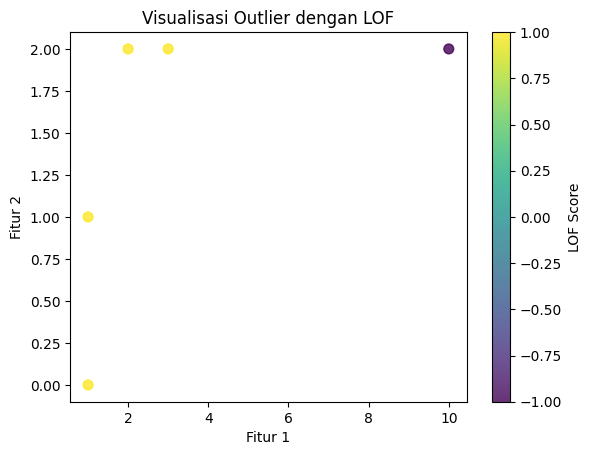

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Dataset
X = np.array([[1,0,1], [2,2,1], [1,1,0], [10,2,0], [3,2,1]])

# Mendefinisikan model LOF
clf = LocalOutlierFactor(n_neighbors=3, p=1)

# Melatih model LOF
predictions = clf.fit_predict(X)

# Visualisasi data
plt.scatter(X[:, 0], X[:, 1], c=predictions, s=50, alpha=0.8)
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.title('Visualisasi Outlier dengan LOF')
plt.colorbar(label='LOF Score')  # Menambahkan label pada colorbar
plt.show()

### Identifikasi Data Real ke Outlier (Data Iris)

Kemudian, pada kali ini akan ditunjukkan cara mendeteksi outlier pada dataset iris menggunakan algoritma Local Outlier Factor (LOF) dari library Scikit-learn. Dataset yang digunakan adalah dataset iris yang terkenal dalam ilmu data. Dataset ini berisi informasi tentang 150 bunga iris dari tiga spesies: Iris Setosa, Iris Versicolor, dan Iris Virginica. Untuk Dataset sendiri sudah tersimpan pada database PostgreSQL dengan nama tabelnya adalah irisoutlier.

In [15]:
df_9 = _deepnote_execute_sql('SELECT * FROM irisoutlier', 'SQL_ED09B93E_4FB0_4700_A502_93A277042FCF', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_9

,id,sepal.length,sepal.width,petal.length,petal.width,variety
0,1,5.1,3.5,1.4,0.2,Setosa
1,2,4.9,3.0,1.4,0.2,Setosa
2,3,4.7,3.2,1.3,0.2,Setosa
3,4,4.6,3.1,1.5,0.2,Setosa
4,5,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Virginica
146,147,6.3,2.5,5.0,1.9,Virginica
147,148,6.5,3.0,5.2,2.0,Virginica
148,149,6.2,3.4,5.4,2.3,Virginica


Berikut merupakan code beserta penjelasan pada setiap langkah-langkah mendekteksi outlier pada Data Iris (PostgreSQL).

Code Program:

In [16]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder

# Memuat dataset iris
iris_df = df_9.copy()  # Dibuat salinan dataset agar data asli tidak termodifikasi

# Memisahkan fitur (X) dan target (y)
X = iris_df.drop('variety', axis=1)  # Mengasumsikan 'variety' adalah kolom target
y = iris_df['variety']

# Encode target variable (opsional, untuk penggunaan kedepannya)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Encode features jika mengandung string
for col in X.columns:
  if X[col].dtype == object:
    X[col] = encoder.fit_transform(X[col])

# Mendefinisikan model LOF
clf = LocalOutlierFactor(n_neighbors=4, p=1, novelty=False)

# Melatih model LOF
clf.fit_predict(X)

# Prediksi outlier
predictions = clf.fit_predict(X)

# Menambahkan kolom baru untuk outlier
iris_df["outlier"] = predictions

# Mengubah format output
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

# Menampilkan hasil sebelum dan setelah outlier
print("Data Sebelum Outlier:")
print(iris_df.head())

print("\nData Setelah Outlier Ditentukan:")
print(iris_df[iris_df['outlier'] != -1].head())

# Menampilkan kolom mana yang merupakan outlier
print("\nKolom Outlier:")
print(iris_df.loc[iris_df['outlier'] == -1, :])

Data Sebelum Outlier:
  id  sepal.length  sepal.width  petal.length  petal.width variety  outlier
0  1          5.10         3.50          1.40         0.20  Setosa       -1
1  2          4.90         3.00          1.40         0.20  Setosa        1
2  3          4.70         3.20          1.30         0.20  Setosa        1
3  4          4.60         3.10          1.50         0.20  Setosa        1
4  5          5.00         3.60          1.40         0.20  Setosa        1

Data Setelah Outlier Ditentukan:
  id  sepal.length  sepal.width  petal.length  petal.width variety  outlier
1  2          4.90         3.00          1.40         0.20  Setosa        1
2  3          4.70         3.20          1.30         0.20  Setosa        1
3  4          4.60         3.10          1.50         0.20  Setosa        1
4  5          5.00         3.60          1.40         0.20  Setosa        1
5  6          5.40         3.90          1.70         0.40  Setosa        1

Kolom Outlier:
      id  sepal.

Langkah-langkah beserta Penjelasan:

1. Memuat dataset dan memisahkan fitur (X) dan target (y).

In [17]:
import numpy as np
import pandas as pd

# Memuat dataset iris
iris_df = df_9.copy()  # Buat salinan dataset agar data asli tidak termodifikasi

# Memisahkan fitur (X) dan target (y)
X = iris_df.drop('variety', axis=1)  # Asumsikan 'variety' adalah kolom target
y = iris_df['variety']

-) df_9 diubah sesuai dengan nama dataset yang digunakan.
-) Kolom 'variety' diasumsikan sebagai kolom target.
-) X berisi dataframe dengan semua fitur kecuali kolom target.
-) y berisi dataframe dengan kolom target.

2. Encode Target Variable (opsional)

In [18]:
# Encode target variable (opsional, untuk penggunaan di masa depan)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

-) Code ini meng-encode target variable y menggunakan LabelEncoder.
-) Langkah ini opsional, dan dapat digunakan untuk keperluan kedepannya.

3. Encode Features jika Mengandung String (opsional)

In [19]:
# Encode features jika mengandung string
# for col in X.columns:
#   if X[col].dtype == object:
#     X[col] = encoder.fit_transform(X[col])

-) Code ini meng-encode fitur-fitur dalam X yang bertipe string menggunakan LabelEncoder.
-) Langkah ini juga opsional, dan hanya diperlukan jika terdapat fitur string dalam dataset.

4. Mendefinisikan model LOF dengan parameter n_neighbors=4 dan p=1

In [20]:
# Mendefinisikan model LOF
clf = LocalOutlierFactor(n_neighbors=4, p=1, novelty=False)

-) Model LOF didefinisikan dengan parameter:
   -> n_neighbors: Jumlah tetangga yang digunakan untuk menghitung LOF.
   -> p: Norma yang digunakan untuk menghitung jarak.
   -> novelty: Menentukan apakah outlier adalah data yang sangat berbeda (True) atau data yang normal (False).

5. Melatih Model LOF dan Memprediksi Outlier

In [21]:
# Melatih model LOF
clf.fit_predict(X)

# Prediksi outlier
predictions = clf.fit_predict(X)

-) Model LOF dilatih pada data X.
-) predictions berisi nilai LOF untuk setiap baris data dalam X.

6. Menambahkan Kolom Baru untuk Outlier dan Mengubah Format Output

In [22]:
# Menambahkan kolom baru untuk outlier
iris_df["outlier"] = predictions

# Mengubah format output
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

-) Kolom baru 'outlier' ditambahkan ke dataframe iris_df.
-) Nilai pada kolom 'outlier' adalah -1 untuk outlier dan 1 untuk non-outlier.
-) Format output diubah untuk menampilkan dua digit desimal.

7. Menampilkan Hasil (Output)

In [23]:
# Menampilkan hasil sebelum dan setelah outlier
print("Data Sebelum Outlier:")
print(iris_df.head())

print("\nData Setelah Outlier Ditentukan:")
print(iris_df[iris_df['outlier'] != -1].head())

# Menampilkan kolom mana yang merupakan outlier
print("\nKolom Outlier:")
print(iris_df.loc[iris_df['outlier'] == -1, :])

Data Sebelum Outlier:
  id  sepal.length  sepal.width  petal.length  petal.width variety  outlier
0  1          5.10         3.50          1.40         0.20  Setosa        1
1  2          4.90         3.00          1.40         0.20  Setosa        1
2  3          4.70         3.20          1.30         0.20  Setosa        1
3  4          4.60         3.10          1.50         0.20  Setosa        1
4  5          5.00         3.60          1.40         0.20  Setosa        1

Data Setelah Outlier Ditentukan:
  id  sepal.length  sepal.width  petal.length  petal.width variety  outlier
0  1          5.10         3.50          1.40         0.20  Setosa        1
1  2          4.90         3.00          1.40         0.20  Setosa        1
2  3          4.70         3.20          1.30         0.20  Setosa        1
3  4          4.60         3.10          1.50         0.20  Setosa        1
4  5          5.00         3.60          1.40         0.20  Setosa        1

Kolom Outlier:
      id  sepal.

-) Data sebelum dan setelah outlier ditampilkan, dengan 5 baris pertama sebagai contoh.
-) Baris data dengan nilai 'outlier' -1 ditampilkan, menunjukkan kolom mana yang merupakan outlier.

Visualisasi Data:

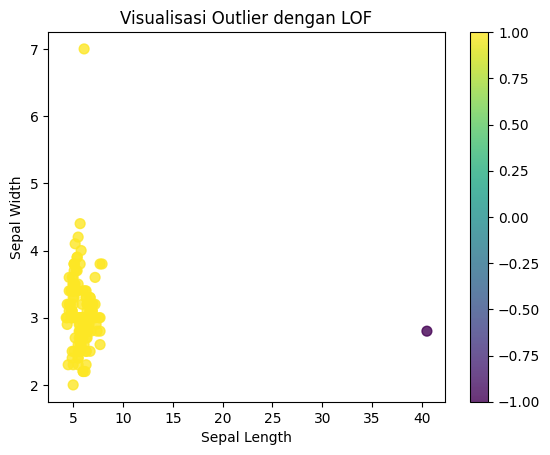

In [24]:
import matplotlib.pyplot as plt

# Visualisasi data
plt.scatter(X['sepal.length'], X['sepal.width'], c=predictions, s=50, alpha=0.8)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Visualisasi Outlier dengan LOF')
plt.colorbar()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=21a3347e-0ad4-4da6-97da-732e20f2b714' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>